# Simulations on Harmonic Oscillator Model
We present results on Jarzynski's equality based on the toy model desribed in https://link.aps.org/doi/10.1103/PhysRevE.56.5018.

Consider a harmonic oscillator Hamiltonian characterised by parameter $\omega_\lambda$. (Mass $m$ is set to 1.)
$$ H_\lambda = \frac{p^2}{2} + \omega_\lambda^2\frac{x^2}{2} $$

Hamilton equations are given as:
\begin{align*}
\dot{x} &= \frac{\partial H}{\partial p} = p \\
\dot{p} &= -\frac{\partial H}{\partial x} = -\omega_\lambda^2 x \\
\end{align*}

## Isolated Oscillator
The oscillator is assumed to be isolated from the environment. The frequency $\omega_\lambda$ is switched from $\omega_0$ to $\omega_1$ in time $t_s$. Initial values of $(x,p)$ are samples from a canonical distribution at temperature $\beta$, $f(x,p) = \frac{\beta \omega_0}{2 \pi} \exp\left( \beta(\frac{p^2}{2} + \omega_\lambda^2\frac{x^2}{2}) \right)$. $N$ independent evolutions are carried out and the work $W_i$ is calculated as $ W_i = \Delta H$ between $t=0$ and $t=t_s$.

We calculate the ensemble average of the work in two ways:
\begin{align*}
W^a &= \frac{1}{N} \sum W_i \\
W^x &= -\beta \log\left(\frac{1}{N} \sum \exp \left( -\beta W_i \right) \right)
\end{align*}

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.integrate

In [14]:
beta = 1.0
omega_0 = 1.0
omega_1 = 2.0
t_s = 10

# omega_t is switched as a linear function of time
def omega_t(t,omega_0 = omega_0,omega_1 = omega_1,t_s = t_s):
    return omega_0 + (omega_1 - omega_0)*(t/t_s)

# y is defined as [x,p]
def dy_dt(y,t):
    dx_dt = y[1]
    dp_dt = -omega_t(t)**2 * y[0]
    return np.array([dx_dt,dp_dt])

# the initial condition is sampled from a canonical distribution
def get_y0(omega_0=omega_0,beta=beta):
    sigma_p = 1/np.sqrt(beta)
    sigma_x = 1.0/(omega_0*np.sqrt(beta))
    x = np.random.normal(scale=sigma_x)
    p = np.random.normal(scale=sigma_p)
    return np.array([x,p])

y0 = get_y0()
N_t = 100
t = np.linspace(0,t_s,N_t)
res = scipy.integrate.odeint(dy_dt,y0,t)

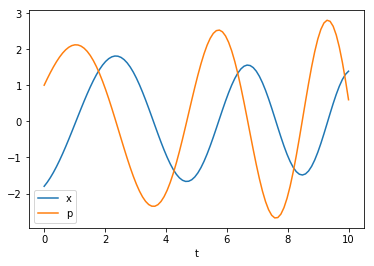

In [15]:
plt.plot(t,res[:,0],label='x')
plt.plot(t,res[:,1],label='p')
plt.legend(loc='best')
plt.xlabel('t')

In [16]:
def calc_H(y,t):
    omega = omega_t(t)
    H = 0.5*y[1]**2 + 0.5*omega**2*y[0]**2
    return H

def calc_W(t,res):
    y0 = res[0]
    y1 = res[-1]
    W = calc_H(y1,t[-1]) - calc_H(y0,t[0])
    return W

W = calc_W(t,res)
print("Work done",W)

Work done 1.93933042538


In [43]:
# wrapper above code to compute W with t_s being the only free parameter
def calc_W(t_s):
    beta = 1.0
    omega_0 = 1.0
    omega_1 = 1.5

    # omega_t is switched as a linear function of time
    def omega_t(t,omega_0 = omega_0,omega_1 = omega_1,t_s = t_s):
        return omega_0 + (omega_1 - omega_0)*(t/t_s)

    # y is defined as [x,p]
    def dy_dt(y,t):
        dx_dt = y[1]
        dp_dt = -omega_t(t)**2 * y[0]
        return np.array([dx_dt,dp_dt])

    # the initial condition is sampled from a canonical distribution
    def get_y0(omega_0=omega_0,beta=beta):
        sigma_p = 1/np.sqrt(beta)
        sigma_x = 1.0/(omega_0*np.sqrt(beta))
        x = np.random.normal(scale=sigma_x)
        p = np.random.normal(scale=sigma_p)
        return np.array([x,p])

    y0 = get_y0()
    N_t = 100
    t = np.linspace(0,t_s,N_t)
    res = scipy.integrate.odeint(dy_dt,y0,t) 
    
    def calc_H(y,t):
        omega = omega_t(t)
        H = 0.5*y[1]**2 + 0.5*omega**2*y[0]**2
        return H

    def calc_W(t,res):
        y0 = res[0]
        y1 = res[-1]
        W = calc_H(y1,t[-1]) - calc_H(y0,t[0])
        return W

    W = calc_W(t,res)
    return W

In [44]:
def calc_avg(W_arr):
    return np.average(W_arr)

def calc_thermal_avg(w_arr,beta):
    return -1.0/beta * np.log(np.average(np.exp(-beta*W_arr)))

In [54]:
# number of simulations
N_sim = 10000
t_s = 10
W_arr = np.array([calc_W(t_s) for i in range(N_sim)])

beta = 1.0
W_a = calc_avg(W_arr)
W_x = calc_thermal_avg(W_arr,beta)
print("Linearly Averaged work",W_a)
print("Thermally averaged work",W_x)

Linearly Averaged work 0.497805212749
Thermally averaged work 0.403777983904


In [53]:
# wrapper around the ensemble average calculation
def calc_a_x_work(t_s):
    N_sim = 10000
    W_arr = np.array([calc_W(t_s) for i in range(N_sim)])

    beta = 1.0
    W_a = calc_avg(W_arr)
    W_x = calc_thermal_avg(W_arr,beta)
    return np.array([W_a,W_x])

In [55]:
# Now we trace over t_s values to see the effect of slowly varying the Hamiltonian
t_s_vec = np.logspace(0,2,5)
W_a_x_array = np.array([calc_a_x_work(t_s) for t_s in t_s_vec])

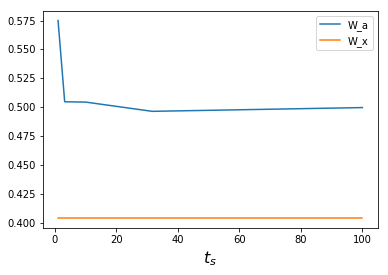

In [56]:
plt.plot(t_s_vec,W_a_x_array[:,0],label='W_a')
plt.plot(t_s_vec,W_a_x_array[:,1],label='W_x')
plt.legend(loc="best")
plt.xlabel(r"$t_s$",fontsize=16)